# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bagus Satrio Wicaksono
- **Email:** bagus.bs667@gmai.com
- **ID Dicoding:** bagus_ssw

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca pada persewaan sepeda per harinya
- Bagaimana perbedaan sewa pada workingday dan holiday
- Pada musim apa persewaan sepeda mengalami tren tertinggi

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("https://raw.githubusercontent.com/myudak/Bike-Exploratory-Data-Analysis/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/myudak/Bike-Exploratory-Data-Analysis/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data dari day_df dan hour_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Kemudian memastikan tidak adanya missing value pada kolom:

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value pada data day_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Kemudian memastikan tidak adanya missing value:

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value pada data hour_df

**Kemudian memeriksa apakah ada data yang duplicate**

In [12]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data yang terduplikat pada dataset tersebut

**Kita cek parameter statistik dari kolom numerik yang terdapat dalam day_df dan hour_df**

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat masalah pada parameter statistik dari kedua tabel

### Cleaning Data

##### Tidak terdapat masalah pada data yang telah di kumpulkan

## Exploratory Data Analysis (EDA)

### Explore ...

Merge kedua tabel:

In [16]:
bikeSharing_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
bikeSharing_df.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Tambahkan pelabelan untuk kondisi cuaca

In [17]:
weather_cond = {
    1: 'Jernih',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}

bikeSharing_df['weather_cond'] = bikeSharing_df['weathersit_daily'].map(weather_cond)

In [18]:
bikeSharing_df.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly,weather_cond
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jernih
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN


Menjumlahkan penyewa pada hari kerja

In [19]:
bikeSharing_df.groupby(by="weathersit_daily").agg({
    "workingday_daily": "count"
}).sort_values(by="workingday_daily", ascending=False)

,workingday_daily
weathersit_daily,
1,11040
2,5871
3,468


In [20]:
bikeSharing_df.groupby(by="weathersit_hourly").agg({
    "workingday_hourly": "count"
}).sort_values(by="workingday_hourly", ascending=False)

,workingday_hourly
weathersit_hourly,
1,11413
2,4544
3,1419
4,3


Tambahkan pelabelan musim

In [21]:
# Mapping label musim
season_mapping = {
    1: 'Musim Dingin',
    2: 'Musim Semi',
    3: 'Musim Panas',
    4: 'Musim Gugur'
}

bikeSharing_df['season_name'] = bikeSharing_df['season_daily'].map(season_mapping)


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh cuaca pada persewaan sepeda per harinya

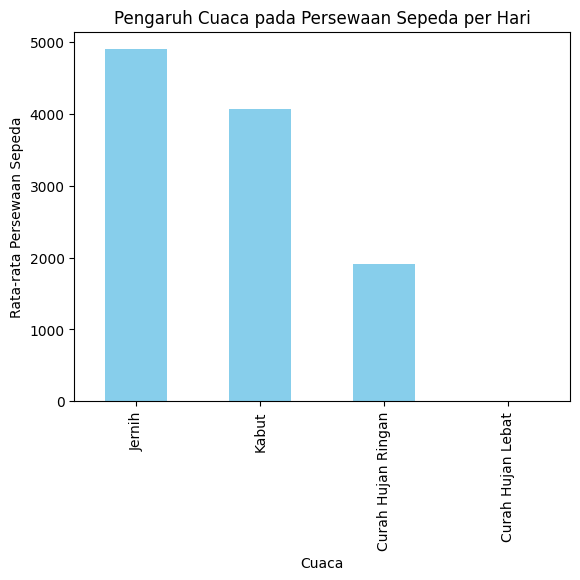

In [22]:
weather_rentals = bikeSharing_df.groupby('weather_cond')['cnt_daily'].mean()
weather_rentals = weather_rentals.reindex(list(weather_cond.values()))
weather_rentals.plot(kind='bar', color='skyblue')
plt.title('Pengaruh Cuaca pada Persewaan Sepeda per Hari')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Persewaan Sepeda')
plt.show()

### Pertanyaan 2: Perbedaan sewa pada workingday dan holiday

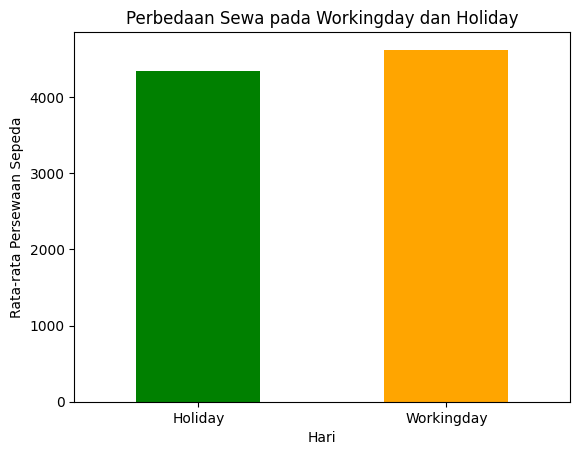

In [23]:
workingday_holiday_rentals = bikeSharing_df.groupby('workingday_daily')['cnt_daily'].mean()
workingday_holiday_rentals.plot(kind='bar', color=['green', 'orange'])
plt.title('Perbedaan Sewa pada Workingday dan Holiday')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Persewaan Sepeda')
plt.xticks([0, 1], ['Holiday', 'Workingday'], rotation=0)
plt.show()

### Pertanyaan 3: Pada musim apa persewaan sepeda mengalami tren tertinggi

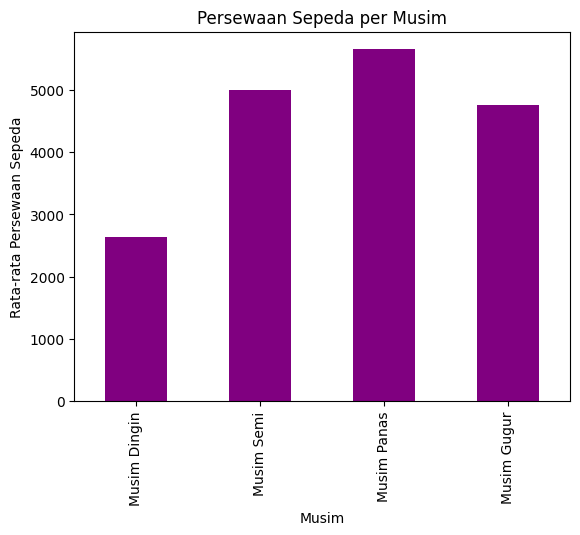

In [24]:
season_rentals = bikeSharing_df.groupby('season_name')['cnt_daily'].mean()
season_rentals = season_rentals.reindex(list(season_mapping.values()))  # Urutkan berdasarkan label musim
season_rentals.plot(kind='bar', color='purple')
plt.title('Persewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Persewaan Sepeda')
plt.show()

## Conclusion

1.   Conclution pertanyaan 1:
  * **Penyewa terbanyak terdapat pada cuaca jernih**, kemudian jumlah penyewa
    mengalami penurunan seiring dengan perubahan cuaca dari berkabut ke hujan ringan dan tidak ada penyewa pada hujan lebat.
2. Conclution pertanyaan 2:
  * **Penyewa terbanyak harian terdapat pada hari kerja(working day)**, hal ini dikarenakan banyak orang melakukan aktivitas dengan keluarga pada hari libur dibandingkan dengan bersepeda. Meskipun demikian perbedaan penyewa tidak signifikan.  
3. Conclution pertanyaan 3:
  * **Persewaan terlaris pada musim Panas** :
    Cuaca musim panas yang sangat jernih sangat cocok dengan aktivitas bersepeda, sehingga banyak orang melakukan aktivitas tersebut.
  * **Musim dengan penyewa paling sedikit adalah Musim Dingin** :
    Dengan dinginnya cuaca pada musim tersebut, membuat kebanyakan orang jarang melakukan aktivitas di luar ruangan, salah satunya juga bersepeda.